In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [4]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753
std,487.868210,2755.563853,1145.616719,4043.795272
min,438.920000,1911.700000,2876.600000,7054.980000
25%,992.715221,4070.460000,4486.730000,10701.130000
50%,1233.761241,5774.260000,5663.300000,15030.510000
75%,1460.250000,7445.560000,6304.630175,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
df_comp['market_value'] = df_comp.spx
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

In [6]:
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

In [7]:
train_df

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


### White Noise Time series data

In [8]:
# generating white noise data 

wn = np.random.normal(loc = train_df.market_value.mean() , scale= train_df.market_value.std(), size = len(train_df))

In [9]:
train_df['wn'] = wn

<ipython-input-9-d3100dcae82c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['wn'] = wn


In [10]:
train_df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1097.544384
std,292.559287,290.761266
min,438.920000,9.414763
25%,914.620000,900.340052
50%,1144.650000,1095.080098
75%,1316.280729,1295.224820
max,1570.252238,2041.599132


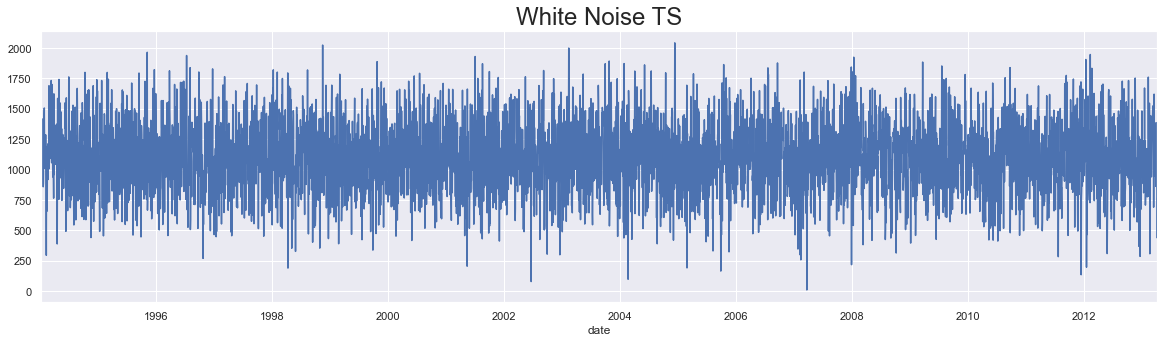

In [11]:
train_df.wn.plot(figsize= (20,5))
plt.title('White Noise TS', size=24)
plt.show()

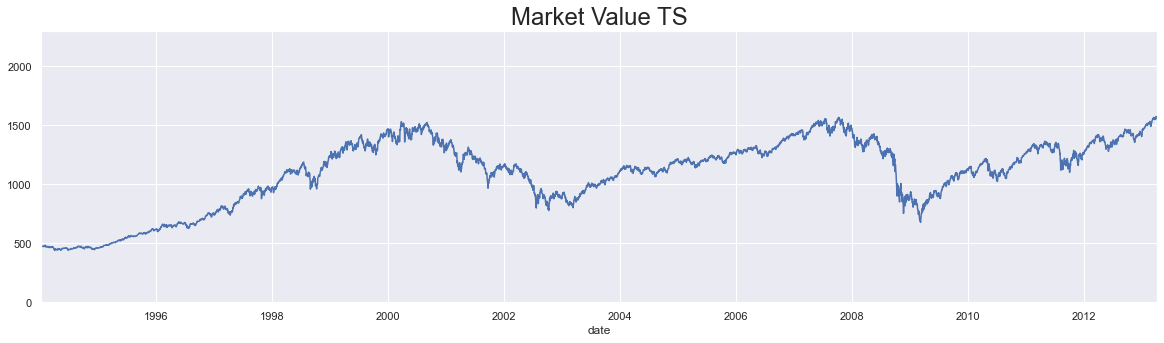

In [12]:
train_df.market_value.plot(figsize= (20,5))
plt.title('Market Value TS', size=24)
plt.ylim(0,2300)
plt.show()

### Random Walk Time Series Data

In [13]:
rw = pd.read_csv('RandWalk.csv')

In [14]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [15]:
rw.date = pd.to_datetime(rw.date, dayfirst=True)

In [16]:
rw.set_index('date', inplace=True)

In [17]:
rw = rw.asfreq('b')

In [18]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [19]:
train_df['RandomWalk'] = rw

<ipython-input-19-c18d8dd75cde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['RandomWalk'] = rw


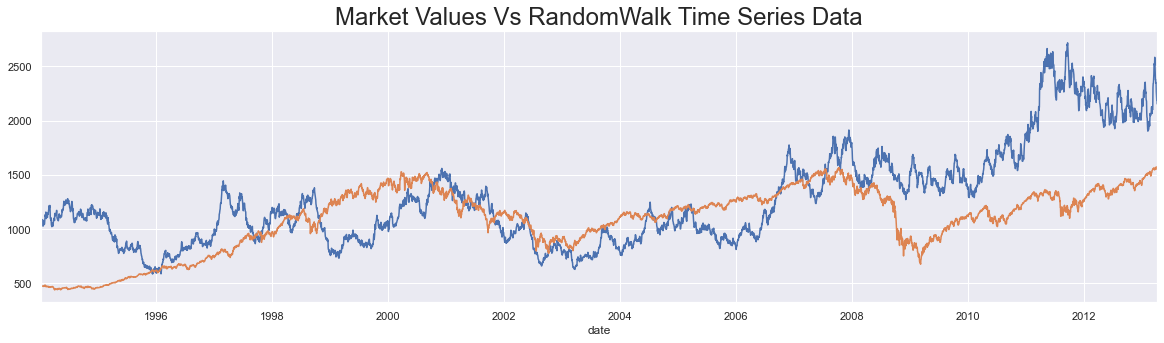

In [20]:
train_df.RandomWalk.plot(figsize=(20,5))
train_df.market_value.plot(figsize= (20,5))
plt.title('Market Values Vs RandomWalk Time Series Data', size=24)
plt.show()

### Detecting Weak Form Stationary

In [21]:
sts.adfuller(train_df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [22]:
sts.adfuller(train_df.wn)

(-69.08546611755415,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70754.57999053824)

In [23]:
sts.adfuller(train_df.RandomWalk)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

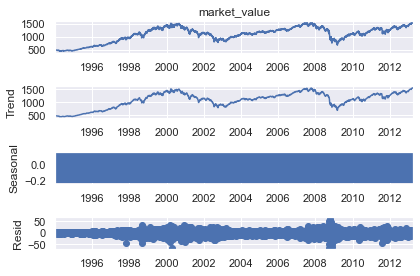

In [24]:
s_dec_additive = seasonal_decompose(train_df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

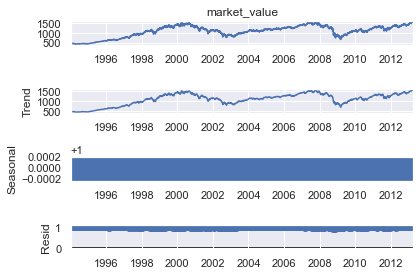

In [25]:
s_dec_multiplicative = seasonal_decompose(train_df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### Computing Autocorrelation

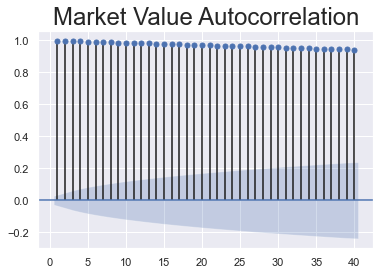

In [32]:
sgt.plot_acf(train_df.market_value, lags = 40, zero=False)
plt.title('Market Value Autocorrelation', size=24)
plt.show()

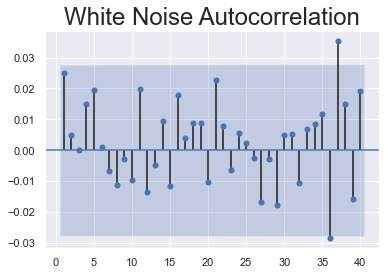

In [33]:
sgt.plot_acf(train_df.wn, lags = 40, zero=False)
plt.title('White Noise Autocorrelation', size=24)
plt.show()

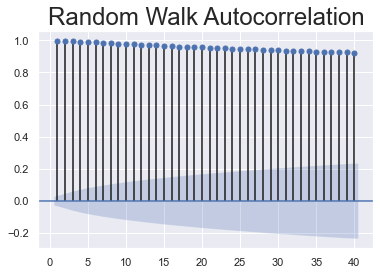

In [34]:
sgt.plot_acf(train_df.RandomWalk, lags = 40, zero=False)
plt.title('Random Walk Autocorrelation', size=24)
plt.show()

### Partial AutoCorrelation

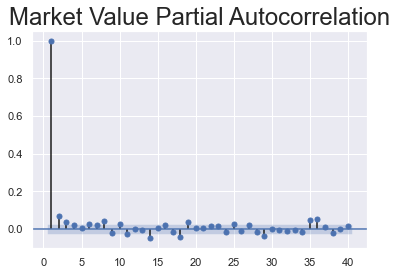

In [35]:
sgt.plot_pacf(train_df.market_value, lags = 40, zero=False, method =('ols'))
plt.title('Market Value Partial Autocorrelation', size=24)
plt.show()

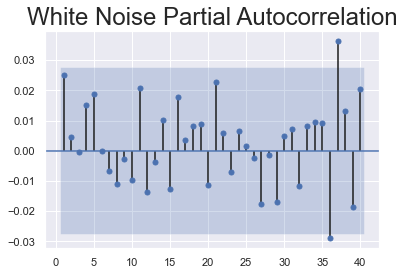

In [36]:
sgt.plot_pacf(train_df.wn, lags = 40, zero=False,method =('ols'))
plt.title('White Noise Partial Autocorrelation', size=24)
plt.show()

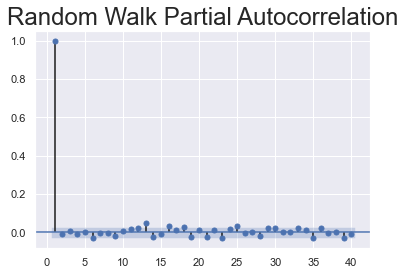

In [38]:
sgt.plot_pacf(train_df.RandomWalk, lags = 40, zero=False,method =('ols'))
plt.title('Random Walk Partial Autocorrelation', size=24)
plt.show()